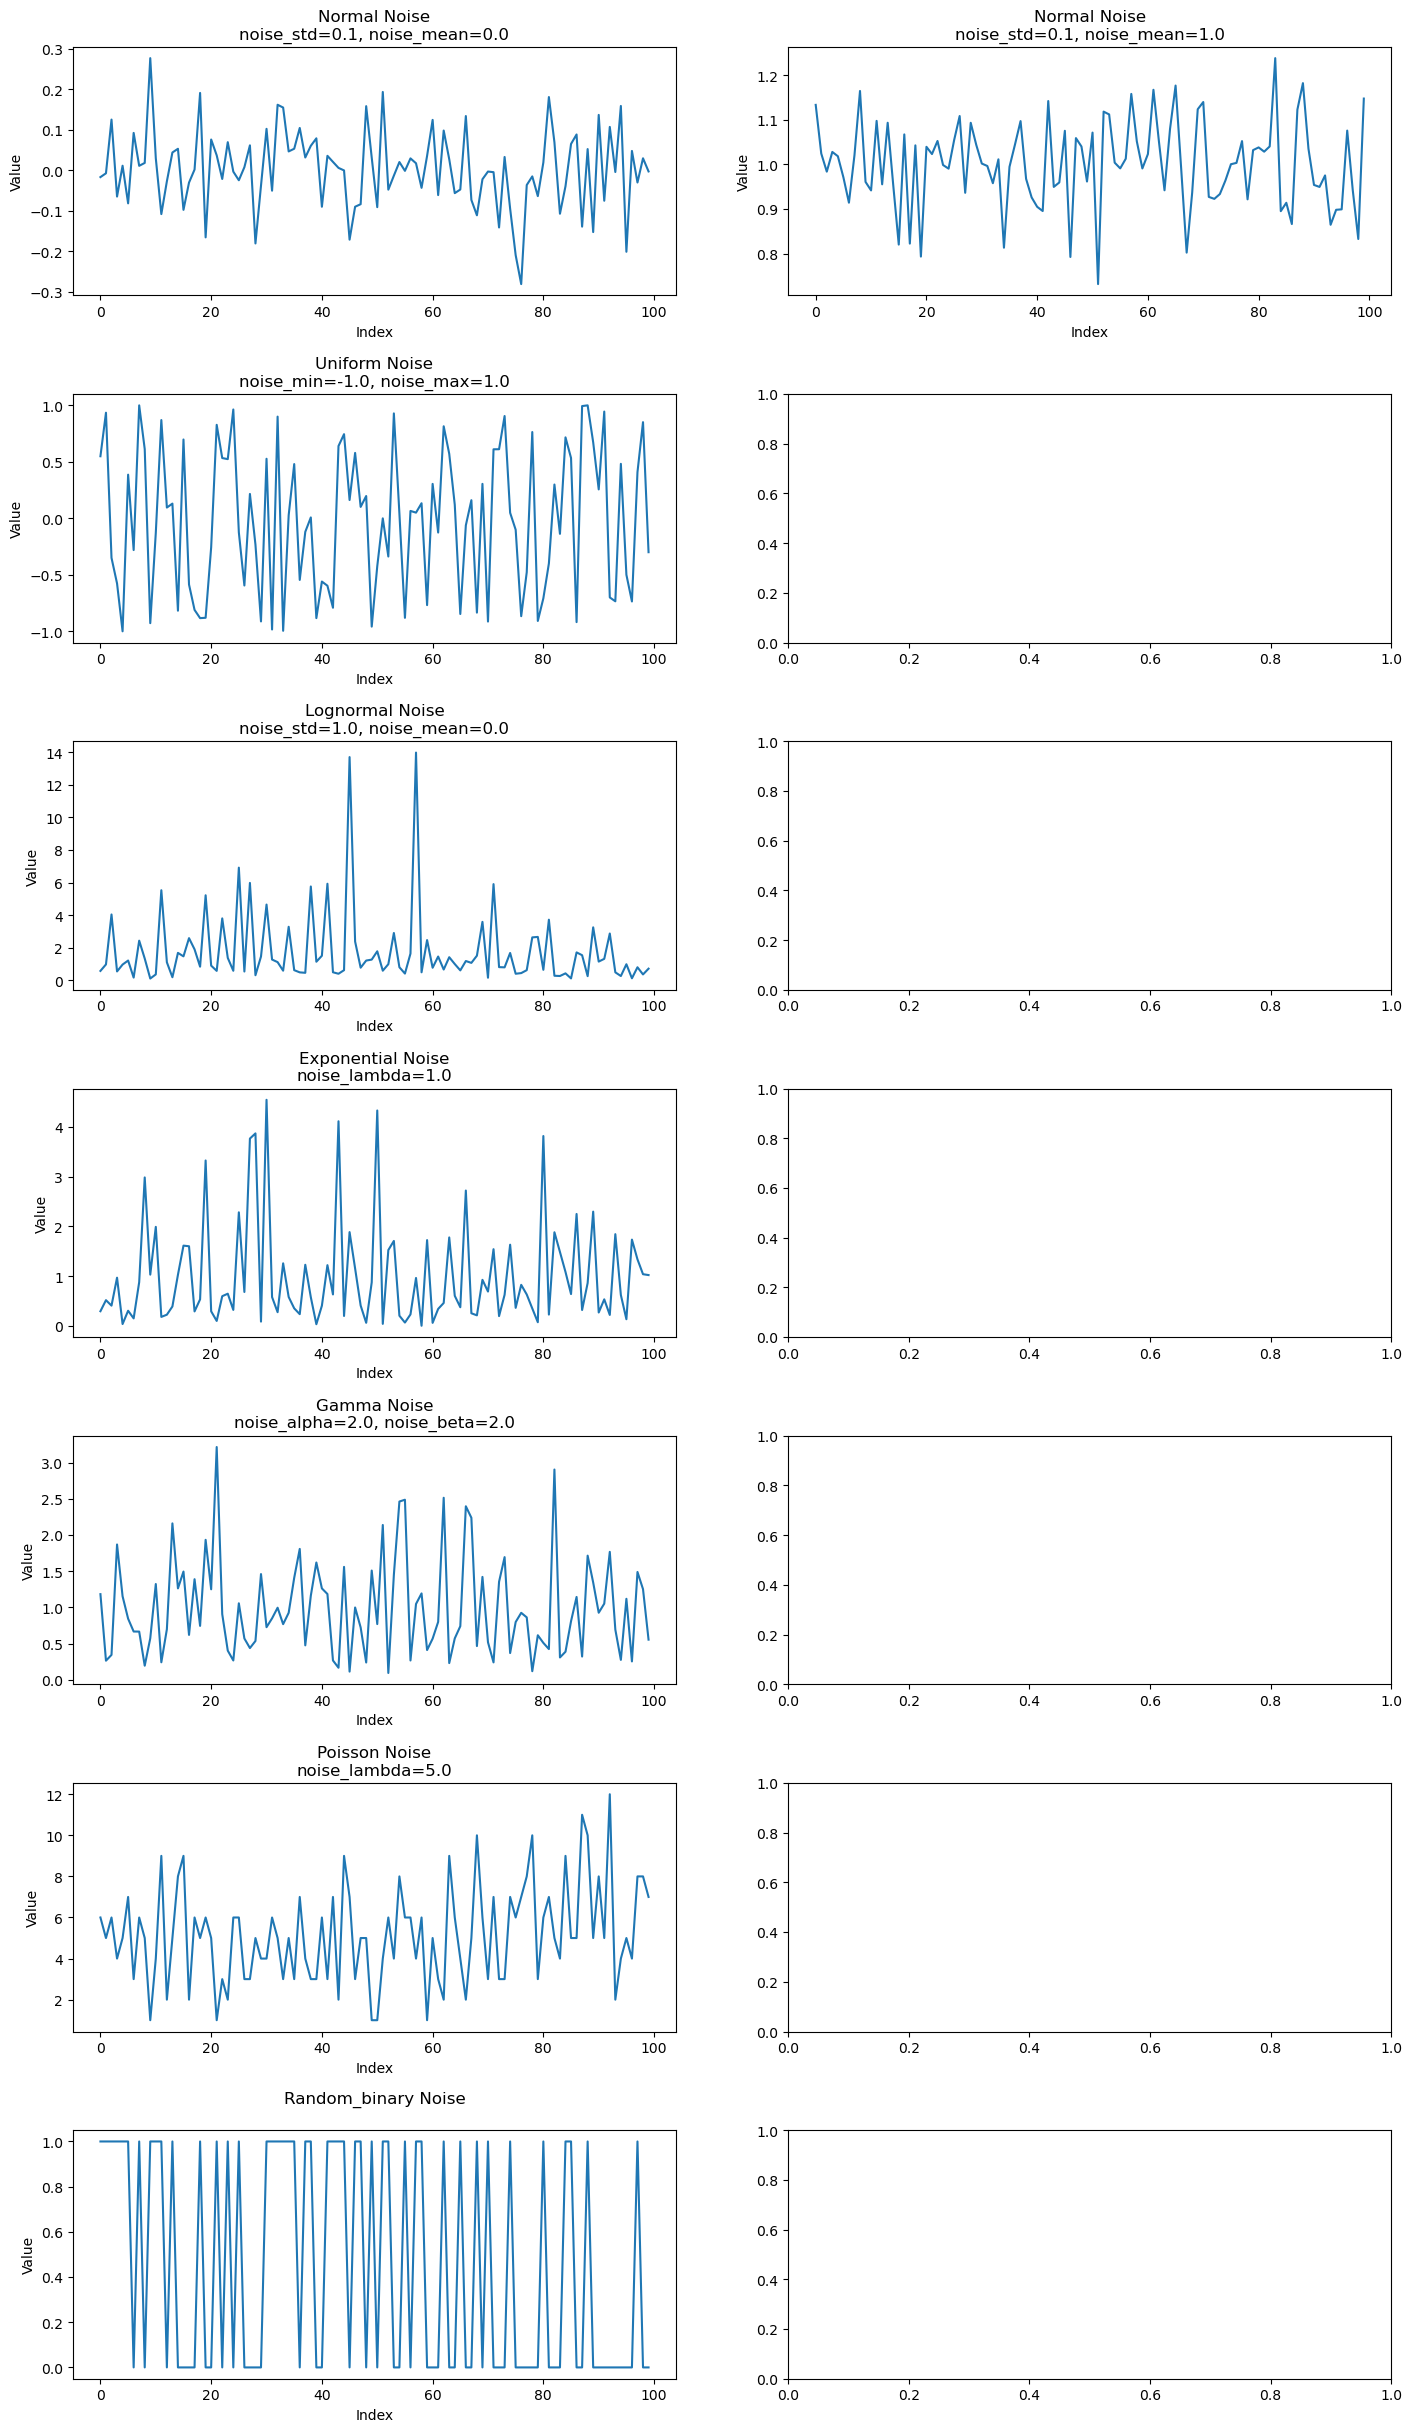

In [1]:
import torch
import matplotlib.pyplot as plt
import itertools

# Parameters for the noise generation
latent_size = 100
batch_size = 1
device = 'cpu'  # Assuming we are running on CPU for this example

# Function for generating noise as given
def generate_noise(batch_size, latent_size, noise_type='normal', config=None):
    if noise_type == 'normal':
        z = torch.randn(batch_size, latent_size).to(device) * config['noise_std'] + config['noise_mean']

    elif noise_type == 'uniform':
        z = torch.rand(batch_size, latent_size).to(device) * (config['noise_max'] - config['noise_min']) + config['noise_min']

    elif noise_type == 'exponential':
        z = torch.distributions.Exponential(config['noise_lambda']).sample((batch_size, latent_size)).to(device)

    elif noise_type == 'lognormal':
        z = torch.distributions.LogNormal(config['noise_mean'], config['noise_std']).sample((batch_size, latent_size)).to(device)

    elif noise_type == 'gamma':
        z = torch.distributions.Gamma(config['noise_alpha'], config['noise_beta']).sample((batch_size, latent_size)).to(device)

    elif noise_type == 'poisson':
        z = torch.poisson(torch.full((batch_size, latent_size), config['noise_lambda'])).to(device)

    elif noise_type == 'random_binary':
        z = torch.randint(0, 2, (batch_size, latent_size)).float().to(device)  # Binary random noise

    else:
        raise ValueError(f"Unsupported noise type: {noise_type}")

    return z

# Define ranges for parameters and ensure they are all lists
noise_params = {
    'normal': {'noise_std': [0.1, 1.0], 'noise_mean': [0.0, 1.0]},  # Limited params for clarity
    'uniform': {'noise_min': [-1.0], 'noise_max': [1.0]},
    'lognormal': {'noise_std': [1.0], 'noise_mean': [0.0]},
    'exponential': {'noise_lambda': [1.0]},
    'gamma': {'noise_alpha': [2.0], 'noise_beta': [2.0]},
    'poisson': {'noise_lambda': [5.0]},
    'random_binary': {}  # No parameters to vary for random_binary
}

# Prepare to plot
fig, axs = plt.subplots(7, 2, figsize=(15, 25))  # One row per noise type, 2 params per type for simplicity
fig.tight_layout(pad=5.0)

# Generate plots for each noise type and parameter set
for row_idx, (noise_type, params) in enumerate(noise_params.items()):
    # Get parameter combinations for the current noise type
    if params:
        param_names = list(params.keys())
        param_combinations = list(itertools.product(*params.values()))
    else:
        param_combinations = [()]  # No parameters to vary for random_binary

    # Iterate over parameter combinations (max 2 plots per noise type)
    for col_idx, config_tuple in enumerate(param_combinations[:2]):
        config = dict(zip(param_names, config_tuple))

        # Generate noise
        z = generate_noise(batch_size, latent_size, noise_type, config)

        # Plot
        axs[row_idx, col_idx].plot(z.cpu().numpy().flatten())
        config_str = ", ".join(f"{k}={v}" for k, v in config.items())
        axs[row_idx, col_idx].set_title(f"{noise_type.capitalize()} Noise\n{config_str}")
        axs[row_idx, col_idx].set_xlabel('Index')
        axs[row_idx, col_idx].set_ylabel('Value')

plt.show()


In [4]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Parameters for the noise generation
latent_size = 1000  # Increased latent size for better visualization
batch_size = 1
device = 'cpu'  # Assuming we are running on CPU for this example

# Function for generating noise as given
def generate_noise(batch_size, latent_size, noise_type='normal', config=None):
    if noise_type == 'normal':
        z = torch.randn(batch_size, latent_size).to(device) * config['noise_std'] + config['noise_mean']

    elif noise_type == 'uniform':
        z = torch.rand(batch_size, latent_size).to(device) * (config['noise_max'] - config['noise_min']) + config['noise_min']

    elif noise_type == 'exponential':
        z = torch.distributions.Exponential(config['noise_lambda']).sample((batch_size, latent_size)).to(device)

    elif noise_type == 'lognormal':
        z = torch.distributions.LogNormal(config['noise_mean'], config['noise_std']).sample((batch_size, latent_size)).to(device)

    elif noise_type == 'gamma':
        z = torch.distributions.Gamma(config['noise_alpha'], config['noise_beta']).sample((batch_size, latent_size)).to(device)

    elif noise_type == 'poisson':
        z = torch.poisson(torch.full((batch_size, latent_size), config['noise_lambda'])).to(device)

    elif noise_type == 'random_binary':
        z = torch.randint(0, 2, (batch_size, latent_size)).float().to(device)  # Binary random noise

    else:
        raise ValueError(f"Unsupported noise type: {noise_type}")

    return z

# Define ranges for parameters and ensure they are all lists
noise_params = {
    'normal': {'noise_std': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0], 'noise_mean': [0.0, 1.0, -1.0, 5.0, -5.0]},
    'uniform': {'noise_min': [-1.0, 0.0], 'noise_max': [0.5, 1.0]},
    'lognormal': {'noise_std': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0], 'noise_mean': [0.0, 1.0, -1.0, 5.0, -5.0]},
    'exponential': {'noise_lambda': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]},
    'gamma': {'noise_alpha': [1.0, 2.0, 3.0], 'noise_beta': [1.0, 2.0]},
    'poisson': {'noise_lambda': [1.0, 2.0, 5.0]},
    'random_binary': {}  # No parameters to vary for random_binary
}

# # Special color configurations (combinations to highlight)
# # Add the combinations you want to highlight in a different color
# highlight_combinations_2 = [
#     {'noise_type': 'lognormal', 'noise_mean': -5.0, 'noise_std': 5.0},
#     {'noise_type': 'uniform', 'noise_max': 1.0, 'noise_min': -1.0},
#     {'noise_type': 'normal', 'noise_mean': -1.0, 'noise_std': 10.0},
#     {'noise_type': 'normal', 'noise_mean': 1.0, 'noise_std': 10.0},
#     {'noise_type': 'normal', 'noise_mean': -1.0, 'noise_std': 5.0},
#     {'noise_type': 'normal', 'noise_mean': 1.0, 'noise_std': 5.0},
#     {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 5.0},
#     {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 2.0},
#     {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 1.0},
#     {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 0.5},
#     # Add other combinations to highlight if needed
# ]

# highlight_combinations_3 = [
#     {'noise_type': 'uniform', 'noise_max': 1.0, 'noise_min': -1.0},
#     {'noise_type': 'normal', 'noise_mean': 1.0, 'noise_std': 10.0},
#     {'noise_type': 'normal', 'noise_mean': 1.0, 'noise_std': 5.0},
#     {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 5.0},
#     {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 2.0},
#     {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 1.0},
#     {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 0.5},
#     # Add other combinations to highlight if needed
# ]

# highlight_combinations = [x for x in highlight_combinations_2 if x in highlight_combinations_3]


highlight_combinations = [{'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 0.5},
 {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 1.0},
 {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 2.0},
 {'noise_type': 'normal', 'noise_mean': 0.0, 'noise_std': 5.0},
 {'noise_type': 'normal', 'noise_mean': 1.0, 'noise_std': 5.0},
 {'noise_type': 'uniform', 'noise_max': 1.0, 'noise_min': -1.0},
 {'noise_type': 'normal', 'noise_mean': 1.0, 'noise_std': 10.0},
 {'noise_type': 'normal', 'noise_mean': -1.0, 'noise_std': 10.0},
 {'noise_type': 'normal', 'noise_mean': -1.0, 'noise_std': 5.0},
 {'noise_type': 'lognormal', 'noise_mean': -5.0, 'noise_std': 5.0}]
# Helper function to check if a config matches a highlight combination
def is_highlighted(config, noise_type, highlight_combinations):
    for comb in highlight_combinations:
        if comb['noise_type'] == noise_type:
            if all(config.get(k) == comb.get(k) for k in comb if k != 'noise_type'):
                return True
    return False

# Set up for plotting
num_plots = sum(len(list(itertools.product(*params.values()))) if params else 1 for params in noise_params.values())
cols = 1
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate the number of rows needed for the grid

fig, axs = plt.subplots(rows, cols, figsize=(25, rows * 3))
axs = axs.flatten()  # Flatten for easier iteration
fig.tight_layout(pad=7.0)


plot_idx = 0

# Generate and plot histograms for each noise type and parameter set
for noise_type, params in noise_params.items():
    if params:
        param_names = list(params.keys())
        param_combinations = list(itertools.product(*params.values()))
    else:
        param_combinations = [()]  # No parameters to vary for random_binary

    for config_tuple in param_combinations:
        config = dict(zip(param_names, config_tuple))

        # Generate noise
        z = generate_noise(batch_size, latent_size, noise_type, config)
        z_numpy = z.cpu().numpy().flatten()

        # Determine the color: default blue, special color if highlighted
        color = 'orange'
        if is_highlighted(config, noise_type, highlight_combinations):
            color = 'blue'  # You can change this to any color you want

        # Calculate symmetric x-limits based on the max absolute value of the generated noise
        max_val = max(abs(z_numpy.min()), abs(z_numpy.max()))
        
        y_limits = (0, 1)   # Adjust for appropriate counts (depends on latent_size)
        if noise_type != 'lognormal':
            x_limits = (-60, 60)
        else:
            x_limits = (-max_val, max_val)


        # axs[plot_idx].hist(z.cpu().numpy().flatten(), bins=50, range=x_limits, color=color) # Plot histogram 
        sns.kdeplot(z.cpu().numpy().flatten(), ax=axs[plot_idx], fill=True, color=color)  # Plot distribution
        
        config_str = ", ".join(f"{k}={v}" for k, v in config.items())
        
        axs[plot_idx].set_xlim(x_limits)
        # axs[plot_idx].set_ylim(y_limits)
        
        axs[plot_idx].set_title(f"{noise_type.capitalize()} Noise\n{config_str}", fontsize=20)
        axs[plot_idx].set_xlabel('Value', fontsize=18)
        axs[plot_idx].set_ylabel('Count', fontsize=18)
        axs[plot_idx].tick_params(axis='both', which='major', labelsize=18)  # Tick labels font size

        plot_idx += 1

# Hide empty subplots if there are any
for i in range(plot_idx, len(axs)):
    axs[i].axis('off')

plt.show()
